In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# Parameters for synthetic data generation
np.random.seed(42)  # For reproducibility
num_days = 252  # Trading days in a year
initial_price = 100  # Starting price of the asset
mu = 0.0005  # Average daily return (0.05%)
sigma = 0.02  # Daily volatility (2%)

# Generate synthetic daily returns using a normal distribution
returns = np.random.normal(loc=mu, scale=sigma, size=num_days)

# Generate price series from returns
prices = [initial_price]
for ret in returns:
    prices.append(prices[-1] * (1 + ret))
prices = np.array(prices)

# Convert to a DataFrame for analysis
data = pd.DataFrame({
    'Day': np.arange(num_days + 1),
    'Price': prices,
    'Return': np.concatenate([[np.nan], returns])
})
print(data.head())


   Day       Price    Return
0    0  100.000000       NaN
1    1  101.043428  0.010434
2    2  100.814536 -0.002265
3    3  102.170872  0.013454
4    4  105.334143  0.030961


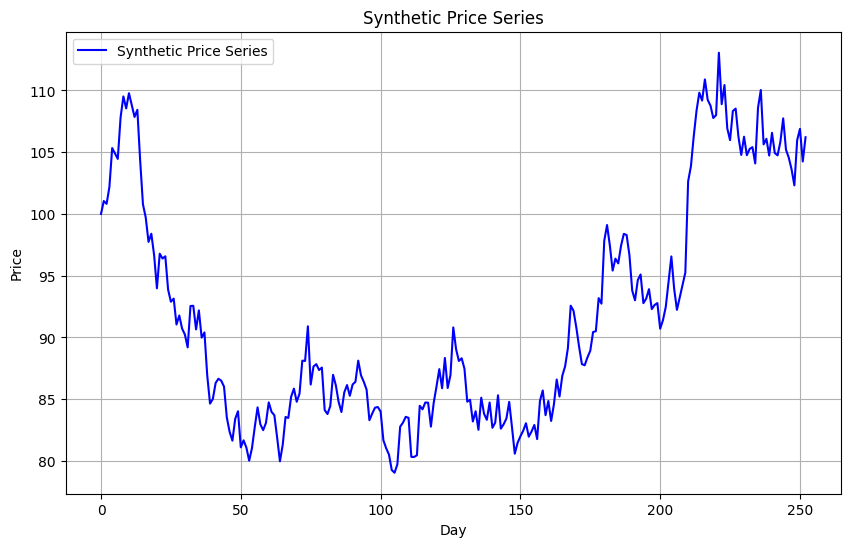

In [4]:
# Plot the synthetic price series
plt.figure(figsize=(10, 6))
plt.plot(data['Day'], data['Price'], label='Synthetic Price Series', color='blue')
plt.title('Synthetic Price Series')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.savefig('synthetic_price_series.png')  # Save the plot
plt.show()


In [5]:
# Calculate VaR and CVaR
confidence_level = 0.95
var_percentile = 100 * (1 - confidence_level)

# Value at Risk (VaR) at 95% confidence level
VaR = np.percentile(returns, 100 * (1 - confidence_level))

# Conditional Value at Risk (CVaR) at 95% confidence level
CVaR = returns[returns <= VaR].mean()

print(f"Value at Risk (VaR) at {confidence_level * 100}% confidence: {VaR:.4f}")
print(f"Conditional Value at Risk (CVaR) at {confidence_level * 100}% confidence: {CVaR:.4f}")


Value at Risk (VaR) at 95.0% confidence: -0.0294
Conditional Value at Risk (CVaR) at 95.0% confidence: -0.0365


In [6]:
# Monte Carlo simulation to estimate potential losses
num_simulations = 10000
simulated_returns = np.random.normal(loc=mu, scale=sigma, size=num_simulations)
simulated_portfolio_changes = simulated_returns * initial_price

# VaR and CVaR for the portfolio
portfolio_VaR = np.percentile(simulated_portfolio_changes, 100 * (1 - confidence_level))
portfolio_CVaR = simulated_portfolio_changes[simulated_portfolio_changes <= portfolio_VaR].mean()

print(f"Portfolio VaR at {confidence_level * 100}% confidence: {portfolio_VaR:.2f}")
print(f"Portfolio CVaR at {confidence_level * 100}% confidence: {portfolio_CVaR:.2f}")


Portfolio VaR at 95.0% confidence: -3.26
Portfolio CVaR at 95.0% confidence: -4.11


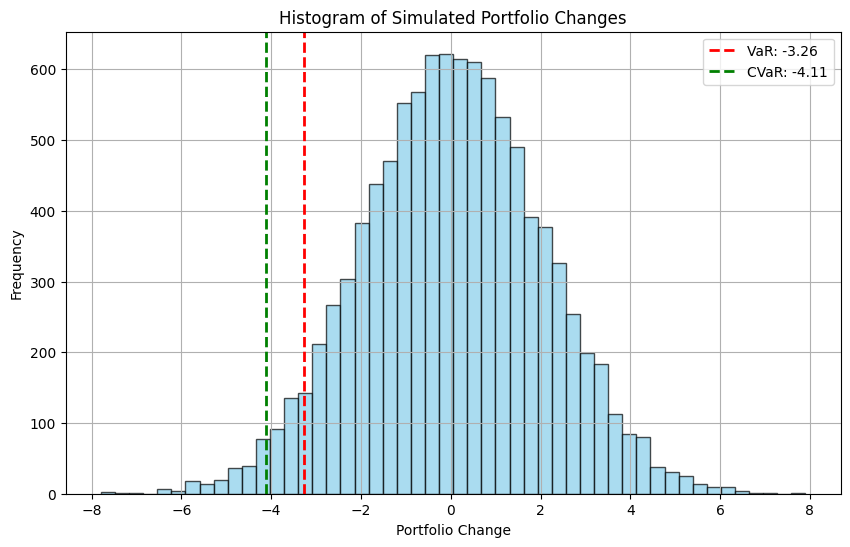

In [7]:
# Plot histogram of simulated portfolio changes
plt.figure(figsize=(10, 6))
plt.hist(simulated_portfolio_changes, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(portfolio_VaR, color='red', linestyle='dashed', linewidth=2, label=f'VaR: {portfolio_VaR:.2f}')
plt.axvline(portfolio_CVaR, color='green', linestyle='dashed', linewidth=2, label=f'CVaR: {portfolio_CVaR:.2f}')
plt.title('Histogram of Simulated Portfolio Changes')
plt.xlabel('Portfolio Change')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.savefig('portfolio_changes_histogram.png')  # Save the plot
plt.show()
